In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch

from transformers import AutoTokenizer, AutoModel

from sklearn.decomposition import PCA

In [19]:
train = pd.read_csv('/content/drive/MyDrive/Project/data/BBB_train.csv')
val = pd.read_csv('/content/drive/MyDrive/Project/data/BBB_valid.csv')
test = pd.read_csv('/content/drive/MyDrive/Project/data/BBB_test.csv')
drugbank_smiles = pd.read_csv('/content/drive/MyDrive/Project/data/drugbank_smiles.csv')

In [22]:
train.head()

,Drug,Y
0,CC(C)(C)OC(=O)CCCc1ccc(N(CCCl)CCCl)cc1,1
1,CC1COc2c(N3CCN(C)CC3)c(F)cc3c(=O)c(C(=O)O)cn1c23,1
2,Cc1onc(-c2ccccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H...,1
3,CCN1CCN(C(=O)N[C@@H](C(=O)N[C@@H]2C(=O)N3C(C(=...,1
4,CN(C)[C@@H]1C(=O)/C(=C(/O)NCN2CCCC2)C(=O)[C@@]...,1


In [40]:
tokenizer = AutoTokenizer.from_pretrained('DeepChem/ChemBERTa-77M-MTR')
model_before = AutoModel.from_pretrained('DeepChem/ChemBERTa-77M-MTR')

Some weights of RobertaModel were not initialized from the model checkpoint at DeepChem/ChemBERTa-77M-MTR and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [41]:
def get_embeddings(smiles):
    inputs = tokenizer(smiles, return_tensors='pt', padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model_before(**inputs)
    return outputs.last_hidden_state[:,0,:]

train_embeddings = torch.cat([get_embeddings(smiles) for smiles in train['Drug']])
val_embeddings = torch.cat([get_embeddings(smiles) for smiles in val['Drug']])
test_embeddings = torch.cat([get_embeddings(smiles) for smiles in test['Drug']])

In [47]:
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_embeddings)
val_pca = pca.transform(val_embeddings)
test_pca = pca.transform(test_embeddings)

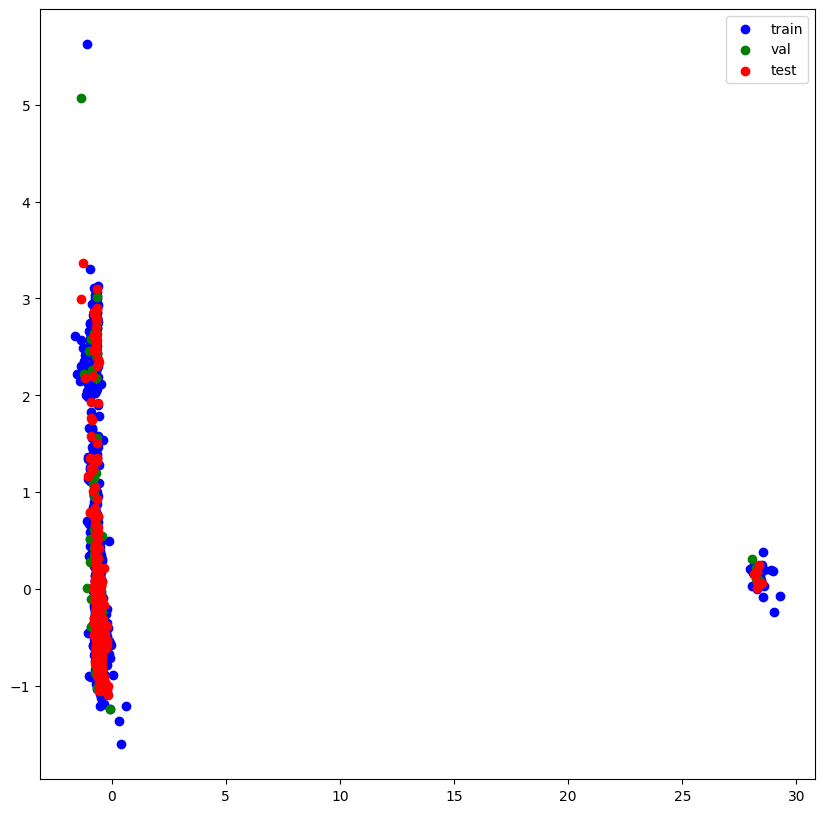

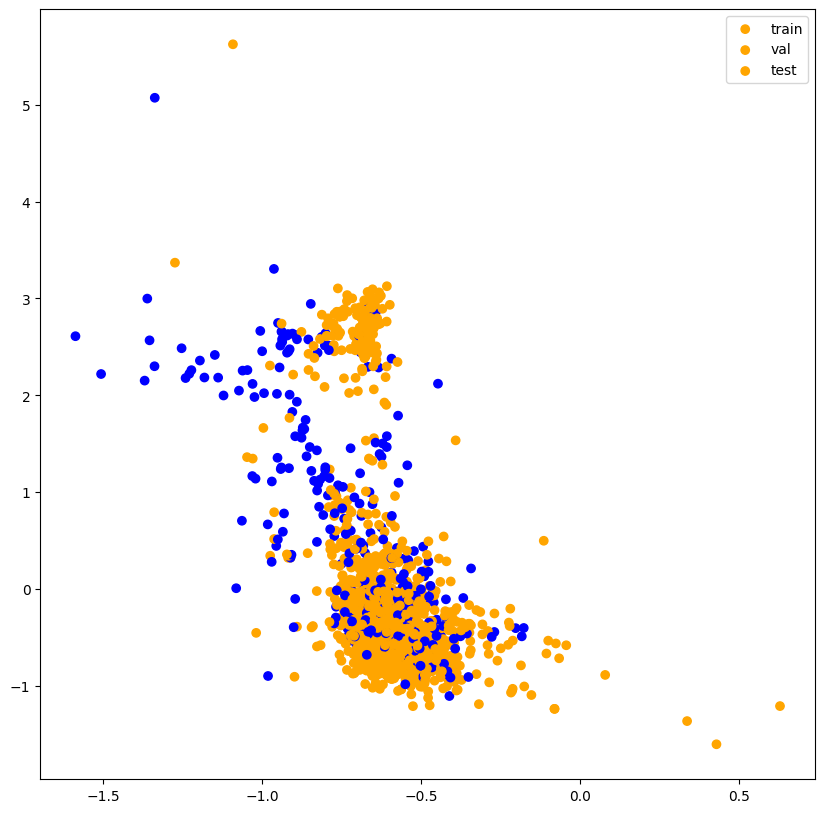

In [48]:
plt.figure(figsize=(10, 10))
plt.scatter(train_pca[:,0], train_pca[:,1], color='blue', label='train')
plt.scatter(val_pca[:,0], val_pca[:,1], color='green', label='val')
plt.scatter(test_pca[:,0], test_pca[:,1], color='red', label='test')
plt.legend()
plt.show()


train_colors = train['Y'].map({0: 'blue', 1: 'orange'})
val_colors = val['Y'].map({0: 'blue', 1: 'orange'})
test_colors = test['Y'].map({0: 'blue', 1: 'orange'})

train_colors = train_colors[train_pca[:,0] < 5]
train_pca = train_pca[train_pca[:,0] < 5]
val_colors = val_colors[val_pca[:,0] < 5]
val_pca = val_pca[val_pca[:,0] < 5]
test_colors = test_colors[test_pca[:,0] < 5]
test_pca = test_pca[test_pca[:,0] < 5]

plt.figure(figsize=(10, 10))
plt.scatter(train_pca[:,0], train_pca[:,1], color=train_colors, label='train')
plt.scatter(val_pca[:,0], val_pca[:,1], color=val_colors, label='val')
plt.scatter(test_pca[:,0], test_pca[:,1], color=test_colors, label='test')
plt.legend()
plt.show()